Makemore as the name suggests, "make more" of the thing it was given. In other word when given a dataset and ingested it, it will render back alike-value. In this case, we do it with a dataset of name.
We will implement five neural networks :
- Bigram (one character predict the following one based on a simple lookup table of count)
- Bag of words
- Multilayer Perceptron (feedforward and fully connected)
- Recurrent Neural Network
    - A RNN is a type of neural network designed to handle sequential data (like text, time series, or speech). Unlike standard neural networks, RNNs have loops that allow information to persist, meaning they can use previous outputs as inputs for the current step. This makes them suitable for tasks where context or order matters, such as language modeling or sequence prediction.
- Gated Recurrent Unit
    - GRUs are a special kind of RNN that use gating mechanisms to better capture long-term dependencies and avoid issues like vanishing gradients. GRUs have two main gates:
        - Update gate: Decides how much of the past information to keep.
        - Reset gate: Decides how to combine new input with previous memory.
- Transformer
    - A Transformer is a type of neural network architecture designed for handling sequential data, especially in natural language processing tasks. Unlike RNNs, GRUs, or LSTMs, Transformers do not process data sequentially. Instead, they use a mechanism called self-attention to weigh the importance of different words in a sequence, allowing them to capture relationships regardless of distance in the input.
        - Not an ensemble: A Transformer is not an ensemble of RNNs, GRUs, or LSTMs. It is a separate architecture.
        - Self-attention: Allows the model to focus on relevant parts of the input sequence for each output.
        - Parallel processing: Can process all tokens in a sequence at once, making it faster to train than RNNs.
        - Widely used: Forms the basis of models like BERT and GPT.


In [1]:
# load dataset
words = open('names.txt', 'r').read().splitlines()

In [2]:
# get some statistic about the dataset
print(f'Number of names: {len(words)}')
print(f'Sum of unique characters: {len(set("".join(words)))}')
print(f'Shortest word {min(len(w) for w in words)} characters: {min(words, key=len)}')
print(f'Longest word {max(len(w) for w in words)} characters: {max(words, key=len)}')

Number of names: 32033
Sum of unique characters: 26
Shortest word 2 characters: an
Longest word 15 characters: muhammadibrahim


A characters language model use the past characters sequence to predict the next character. In other word in a simple word such as [charlotte], there is actually a lot of informations.
- After c likely comes h, 
- after h likely comes a, 
- etc.
- After charlotte, the word is likely to end.

First we will build the Bigram. A prediction fo the next character based on the current character. Very simple and weak model since it completly ignore any other information about the context (total size, full sequence of characters, some sequence tends to be smaller/bigger than others, etc.)

In [3]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(f'{ch1} -> {ch2}')

e -> m
m -> m
m -> a


In [4]:
# we create a special character to hallucinate the start and end of the string.
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(f'{ch1} -> {ch2}')

<S> -> e
e -> m
m -> m
m -> a
a -> <E>


In [5]:
# now we count each occurance of a character pair
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # same as b[bigram] + in case it's not in the dictionary, we return 0
b.items()  # this will return a list of tuples (key, value) pairs

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [6]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
# it is easier for us to store theses statistics in a 2 dimensional array rather than a dictionary. The row will be the first character and the column the second character. (in a way : 1st dimension = what am I currently; 2nd dimension = what is coming after me according to the dataset)
# for this, we use pytorch (deep learning neural network library)
import torch
N = torch.zeros([28,28], dtype=torch.int32) # dimension size is : amount of unique characters + 2 (for <S> and <E>)


In [8]:
# Here, we need to transform our string (ie characters) into numbers(int32). we need a lookup table for this. Since the dataset is small, we can do it at once on memory but for larger datasets, we would need to do it in a more memory efficient way.

# 1. get the list of vocabulary
vocab = sorted(list(set(''.join(words))))
vocab = ['<S>'] + vocab + ['<E>']  # add start and end characters
# 2. create the lookup table
stoi = {s:i for i,s in enumerate(vocab)}

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        # here we map the character to the corresponding index in the vocabulary
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1  # increment the count for the bigram (ix1, ix2)

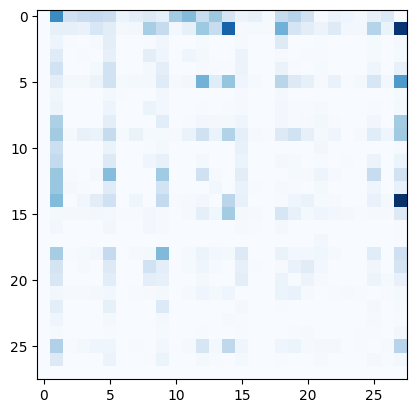

In [9]:
# let's visualise the array nicer with matpolib
import matplotlib.pyplot as plt
plt.imshow(N, cmap='Blues')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

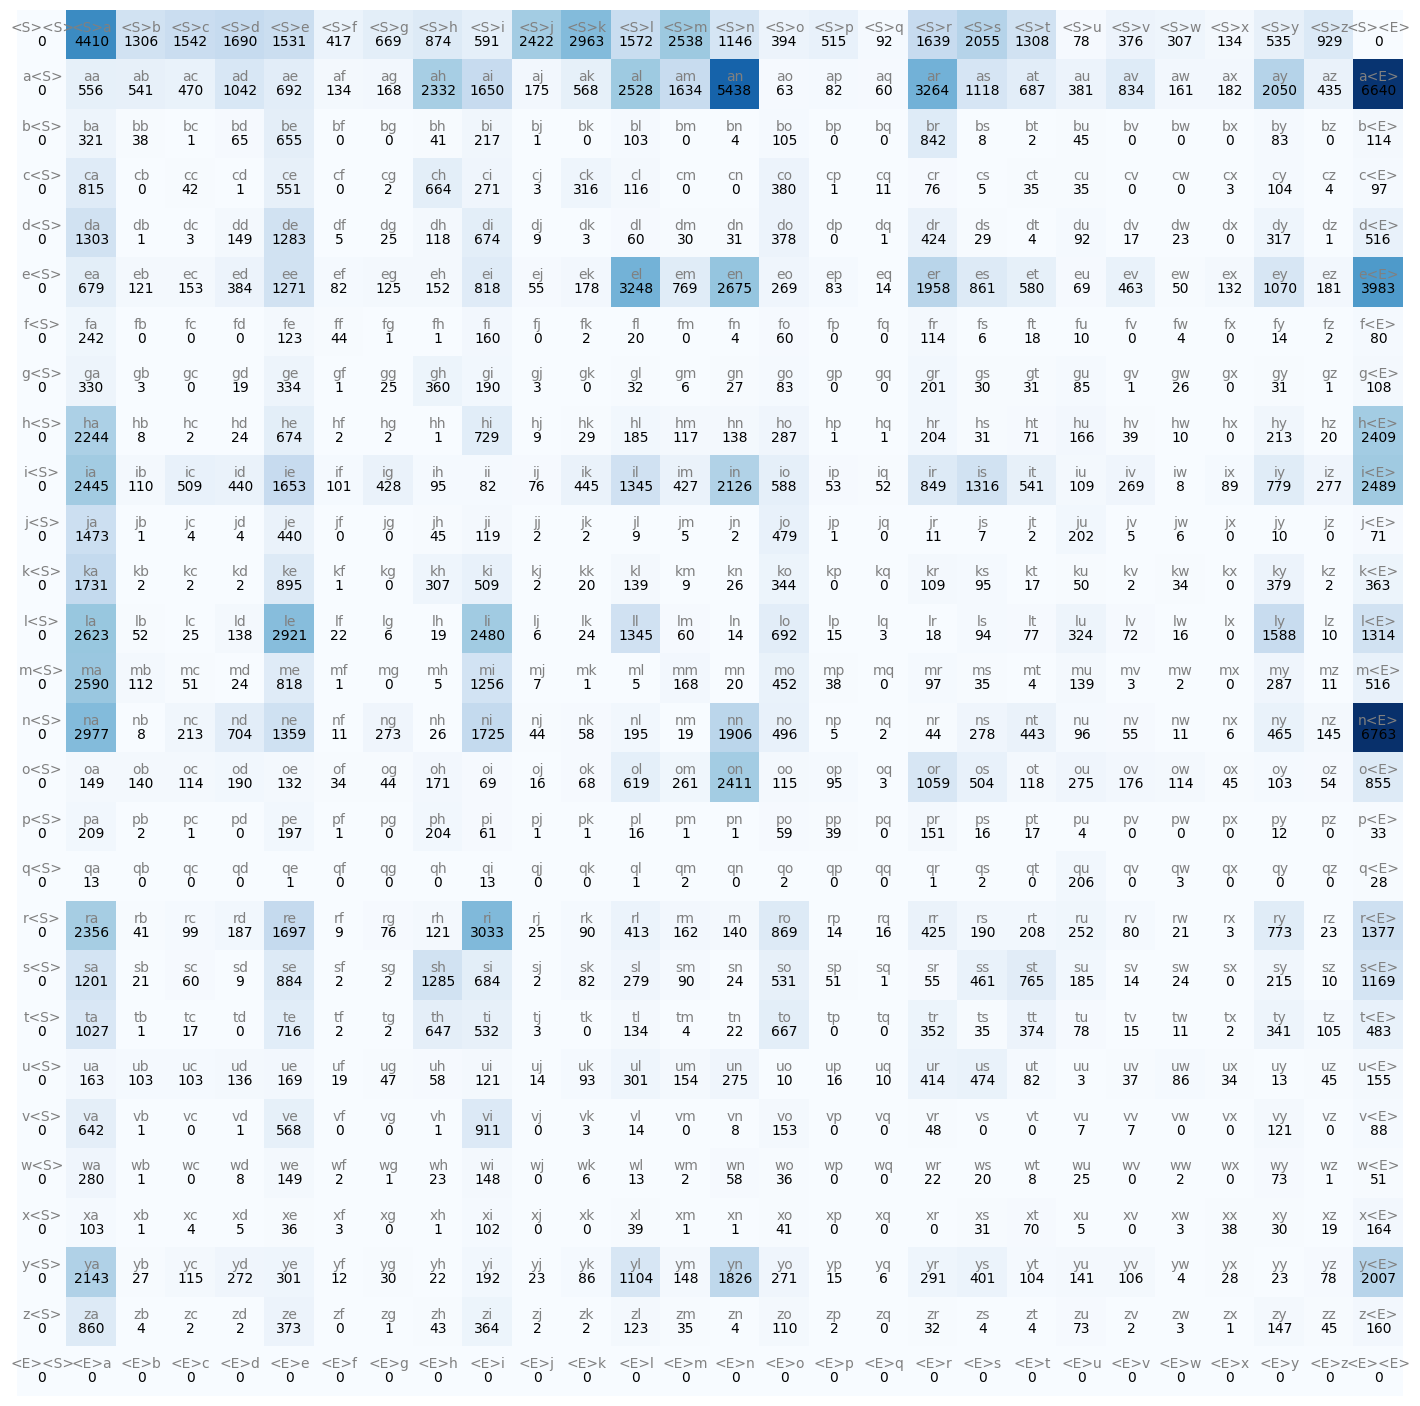

In [10]:
# let's invert the array so we can start with the first character
itos = {i:s for s,i in stoi.items()}

%matplotlib inline

plt.figure(figsize=(18, 18))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chrstr = itos[i] + itos[j]
        plt.text(j, i, chrstr, ha='center', va='bottom', color='grey')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='black')
plt.axis('off')

In [11]:
# remember that each element of this array are Tensors, not integers. To obtain the integer value, we need to call the .item() method on the Tensor.
N[2,2]

tensor(38, dtype=torch.int32)

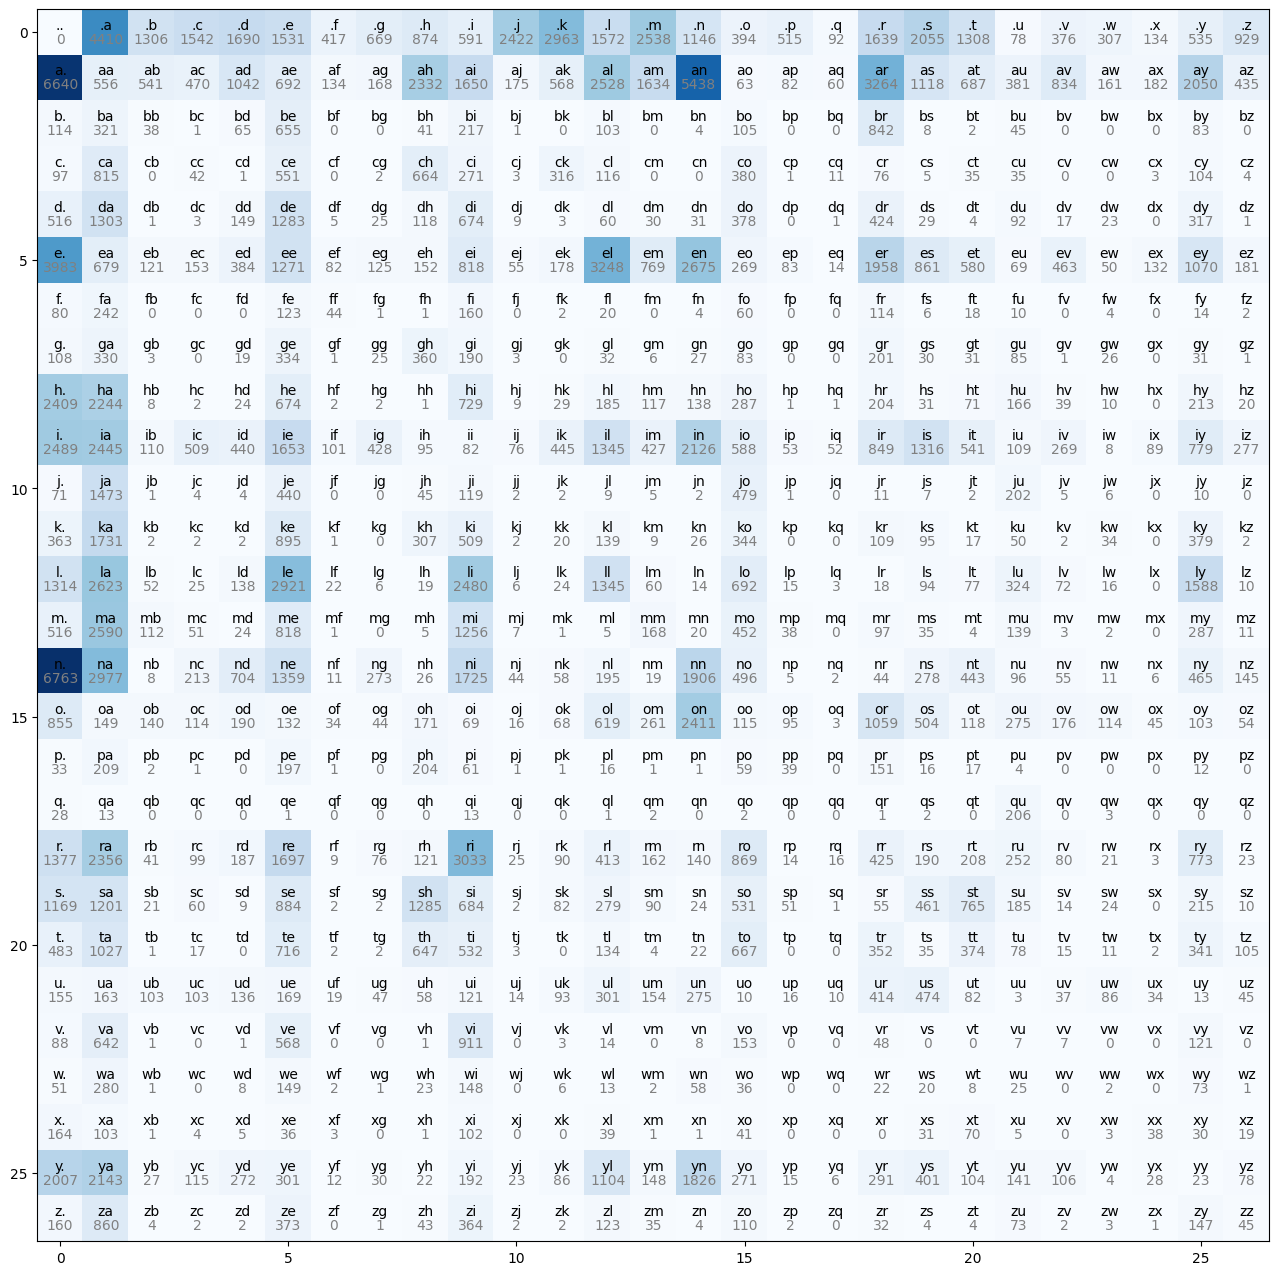

In [12]:
# now you may have seen a problem when vizualiting. One row and one column are only filled by 0. Theses are the columns with ending <S> and starting <E> characters. Theses bigram can never appear in a string. 
# also each of theses brackets (<S> and <E>) are really noisy.
# so let's make it simplier and cleaner.
N = torch.zeros([27,27], dtype=torch.int32)  # reset the array with only one special character

chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i,s in enumerate(chars)} # we start the index at 1 so that we can use 0 for the special character
stoi['.'] = 0  # add only ONE special character
itos = {i:s for s,i in stoi.items()}

for w in words:
    chs = ['.'] + list(w) + ['.']  # use the special character for start and end
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):  # +1 for the special character
    for j in range(27):
        chrstr = itos[i] + itos[j]
        plt.text(j, i, chrstr, ha='center', va='bottom', color='black')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='grey')

In [13]:
N[0, :] # theses are the 27 characters that can follow the start character '.'

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [14]:
# rather than working with occurrences, we want to work with probabilities. So we need to normalize the array.
# we do this by dividing each row by the sum of the row.
prob = N[0].float()
prob = prob / prob.sum()
prob

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [15]:
# to sample from there we use torch.multinomial (take probabilities and return integers sample according to prob distribution)
# we generate a seed for reproducibility
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g) 
p = p/sum(p)
print(p)
for idx, prob_value in enumerate(p):
    print(f'Index: {idx}, Probability: {prob_value.item()}')
# now using torch.multinomial will return the asked for amount of sample following the probability distribution presents in the tensor
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([0.6064, 0.3033, 0.0903])
Index: 0, Probability: 0.606378436088562
Index: 1, Probability: 0.30333879590034485
Index: 2, Probability: 0.0902828499674797


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [16]:
# now let's sample our first element from our lookup table. We need the replacement=True otherwise the item will be removed after taking it.
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(prob, num_samples=1, replacement=True, generator=g).item()
print(itos[ix])


c


In [17]:
# now we know the first character, we can "find" the second one by doing the same but with the corresponding row in the array.
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out= []
    ix = 0
    while True:
        p = N[ix].float()
        p = p/p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix]) # fill the output as it get created
        if ix == 0:
            break
    print(''.join(out))

    # the samples aren't great because it is only a basic bigram model. It predict the next character with ONLY the current one. Not the total size of the string, the ones before, the probability of a single character following two others, etc. You can check that the resultat is actually real by change the p to p  = torch.ones(27)/27. This will give you an uniform probabilities and will give you extremly bad results.

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [32]:
# now we want to change the previous code because we don't want to fetch a row of N from the count matrix every time (N[ix]) then normalizing them. here, it can be used as showed but with bigger array, it become really problematic. So we prepare a matrix I with the probabilities inside it.

#region training model
P = (N+1).float()
#P = P / P.sum(dim=1, keepdim=True)  
# normalize each row to sum to 1. We divide a [27, 27] matrix by a [27, 1] matrix to get a [27, 27] matrix. The keepdim=True keeps the dimension of the second matrix so that it can be broadcasted to the first one.
# see "broadcasting". To use this there a two rules : 1. each tensor has at least on dimension, => align all dimensions to the right when checking 2. when iterating over the dimension size, starting at the trailing dimension, the dimension size must either be equal, one of them is 1 or one of them does not exist (ie the tensor has less dimensions than the other one).
# In our case, it works. What is done to the dimension 1  is that it is strechted of all of the other matrix dimensions. (If a dimension is missing, it is "replaced" by a dimension 1)
# [ 27, 27 ]
# [ 27, 1  ]
# rather than P = P/ P.sum which create a new tensor, we can do it in place with P /= P.sum(dim=1, keepdim=True) which is more memory efficient.
P /= P.sum(dim=1, keepdim=True)
#P[0].sum()  # this should be 1.0
# endregion


In [19]:
# theses tensor are worth learning about to dodge basic trap. By exemple [1, 27] and [27] can both be used to broadcast on [27, 27] but they will not have the same result. The first one is a two dimesnionnal tensor (Column vector) while the second is a flat vector with 1 dimension.

In [33]:


# now we use this new matrix P and we should have the exact same result.
g = torch.Generator().manual_seed(2147483647)

#region sampling
for i in range(3):
    out= []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix]) # fill the output as it get created
        if ix == 0:
            break
    print(''.join(out))
# endregion

cexze.
momasurailezitynn.
konimittain.


In [21]:
# we trained a language model, we trained it with normal frenquency and then we normalized for faster sampling.
# so we :
# - trained a model
# - we sampled from the model

# now, let's try to evaluate the quality with [training, validation, test] split.

In [22]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']  # use the special character for start and end
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        # we print the bigrams and check their probability. In average, the probability should be 1/27 (since there are 27 possibilities when you know teh first character (I.e, the row to look at)).
        # if you have a very good model, thoses showed should be close to 1 since ttheses are the original data and the model should see them as the "correct answer"
        print(f'{ch1}{ch2} - {prob:.4f}')


.e - 0.0478
em - 0.0377
mm - 0.0253
ma - 0.3899
a. - 0.1960
.o - 0.0123
ol - 0.0780
li - 0.1777
iv - 0.0152
vi - 0.3541
ia - 0.1381
a. - 0.1960
.a - 0.1377
av - 0.0246
va - 0.2495
a. - 0.1960


In [23]:
# what is used now will be the likelihood., the producte of all probabilities of the next token to be the one we want.
# for conveiance, people use the log likelihood. It is easier to compute and it is more stable. The log likelihood is the sum of the log of the probabilities.

# log(a*b*c) = log(a) + log(b) + log(c)

log_likelihood = 0.0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1}{ch2} {prob:.4f} {logprob:.4f}')
print(f'Log likelihood: {log_likelihood=}') # log likelihood goes from 0 (the best, where all probabilities are = 1) to -inf (the worst, where all probabilities are = 0). The closer to 0, the better the model is.

.e 0.0478 -3.0408
em 0.0377 -3.2793
mm 0.0253 -3.6772
ma 0.3899 -0.9418
a. 0.1960 -1.6299
.o 0.0123 -4.3982
ol 0.0780 -2.5508
li 0.1777 -1.7278
iv 0.0152 -4.1867
vi 0.3541 -1.0383
ia 0.1381 -1.9796
a. 0.1960 -1.6299
.a 0.1377 -1.9829
av 0.0246 -3.7045
va 0.2495 -1.3882
a. 0.1960 -1.6299
Log likelihood: log_likelihood=tensor(-38.7856)


In [24]:
# what we actually want is a loss function rather, so the closer to 0, the better the model is. So we take the negative log likelihood.
loss = -log_likelihood
loss

tensor(38.7856)

In [ ]:
# one more thing we can do is to normalize rather than a sum.
loss = 0.0
log_likelihood = 0.0
n = 0 # counter

for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2} {prob:.4f} {logprob:.4f}')

print(f'Log likelihood: {log_likelihood=}') 
print(f'Loss: {-log_likelihood}')
print(f'Loss normalized: {-log_likelihood / n}')  # this is the average loss per character

.e 0.0478 -3.0408
em 0.0377 -3.2793
mm 0.0253 -3.6772
ma 0.3899 -0.9418
a. 0.1960 -1.6299
.o 0.0123 -4.3982
ol 0.0780 -2.5508
li 0.1777 -1.7278
iv 0.0152 -4.1867
vi 0.3541 -1.0383
ia 0.1381 -1.9796
a. 0.1960 -1.6299
.a 0.1377 -1.9829
av 0.0246 -3.7045
va 0.2495 -1.3882
a. 0.1960 -1.6299
Log likelihood: log_likelihood=tensor(-38.7856)
Loss: 38.78563690185547
Loss normalized: 2.424102306365967


In [ ]:
# we want to maximize the likelihood based on the parameters. For now, we have them stored in array and calculated based on the dataset but later the neural network will have to calculate and keep them.
# equivalent to maximizing the log of likelihood (because log is monotonic, just scaling)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log lokelihood (the loss)

# log(a*b*c) = log(a) + log(b) + log(c)

In [26]:
# one more thing we can do is to normalize rather than a sum.
loss = 0.0
log_likelihood = 0.0
n = 0 # counter

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f'Loss normalized: {-log_likelihood / n}')

Loss normalized: 2.454094171524048


In [30]:
# We can use this wor any single wor we want to evaluate.
loss = 0.0
log_likelihood = 0.0
n = 0

for w in ["andrej"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2} {prob:.4f} {logprob:.4f}')

print(f'Log likelihood: {log_likelihood=}') 
print(f'Loss: {-log_likelihood}')
print(f'Loss normalized (on THIS exemple): {-log_likelihood / n}')
# here you can see that the reason the loss is higher (so more unlikely to be created) is mostly because of the ej, nd and j. bigrams
# if we change andrej to andrejq, the loss will be inf because the chance of jq happening is 0. So the model will never predict it.

.a 0.1377 -1.9829
an 0.1605 -1.8296
nd 0.0384 -3.2594
dr 0.0771 -2.5620
re 0.1336 -2.0127
ej 0.0027 -5.9171
j. 0.0245 -3.7098
Log likelihood: log_likelihood=tensor(-21.2735)
Loss: 21.273456573486328
Loss normalized (on THIS exemple): 3.03906512260437


In [ ]:
# to fix this because a 0 possibility should never exists unless it truly is something that should NEVER happen, we use model smoothing.
# we add a small value to each probability so that it never becomes 0.
# The more you add, the more smooth the model is. The less you add the more peaked the model will be. In théory, you do not want to be close to either extreme.
# here, we add 1 to each count before normalizing
# P = N.float() become P = (N + 1).float()
P = (N+1).float()
P /= P.sum(dim=1, keepdim=True)

loss = 0.0
log_likelihood = 0.0
n = 0

for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2} {prob:.4f} {logprob:.4f}')

print(f'Log likelihood: {log_likelihood=}') 
print(f'Loss: {-log_likelihood}')
print(f'Loss normalized (on THIS exemple): {-log_likelihood / n}')

.a 0.1376 -1.9835
an 0.1604 -1.8302
nd 0.0384 -3.2594
dr 0.0770 -2.5646
re 0.1334 -2.0143
ej 0.0027 -5.9004
jq 0.0003 -7.9817
q. 0.0970 -2.3331
Log likelihood: log_likelihood=tensor(-27.8672)
Loss: 27.867216110229492
Loss normalized (on THIS exemple): 3.4834020137786865


In [ ]:
# we build our model by doing something that felt sensible. We were doing counts and then normalizing theses counts to get probabilities.
# we then used these probabilities to sample from the model.

# now we want to use an alternative approach (to still have a similar result). We want to cast the problem of bigram into the neural network framework
# waht we want is for it to receive a single character as input, it has some parameter (weight or other parameters) and it output the probability of the next character.
# we also want to evaluate each setting of the neural network with the loss function we defined before.

In [41]:
# create the training set of all the bigrams. (x,y), 
# this training set will be made of two lists (input and targets)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [42]:
xs

tensor([ 0,  5, 13, 13,  1])

In [43]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# we need to be careful with the APIs of theses neural network (in this case we used torch.tensor) By exemple, with torch, there is torch.tensor and torch.Tesnor. whihc according to the doc have no difference but in a Q & A on stakoverflow, you can discover that tensor use the default dtype (float32) while Tensor use the dtype of the current tensor. So if you want to create a tensor with a specific dtype, you should use torch.tensor.

# we don't want to input integer value but rather vector (or tensor) into our neural network, to created the needed neurons.
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27)

xenc.shape

torch.Size([5, 27])

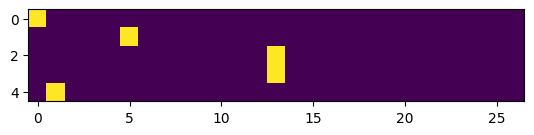

In [ ]:
plt.imshow(xenc)

In [ ]:
# Right now, our vector are of integer type which we don't want since it will delete a large part of the data. We want to convert them to float32 so that we can use them in the neural network.
xenc.dtype

torch.int64

In [52]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc.dtype

torch.float32

In [57]:
W = torch.randn((27,1)) # weight on size. Random result based on Standart Normal Distribution
xenc @ W

tensor([[ 0.1603],
        [-1.2800],
        [-1.2705],
        [-1.2705],
        [ 0.5937]])

In [ ]:
(xenc @ W).shape # 5, 27 @ 27, 1 => 5, 1
# 5 activation of a neuron on 5 input

torch.Size([5, 1])

In [ ]:
# we want 27 neurons.
# 5, 27 @ 27, 27 => 5, 27
W = torch.randn([27, 27])
xenc @ W

tensor([[ 1.4200, -1.0251, -0.6325, -1.2110,  1.1818, -0.3940, -0.9262, -0.0456,
          0.7440, -0.6635, -0.6718, -1.1202,  1.8022,  0.7002, -0.7980, -0.0329,
         -0.4587, -0.5521,  0.3496,  0.4530, -0.2949,  0.3767, -1.7253, -1.8485,
          0.7526, -0.2815,  0.2844],
        [ 0.7649,  1.0500,  0.8819, -0.4397,  0.6578,  0.5815,  0.8737,  0.4272,
         -0.8232, -0.4459,  0.6516,  2.0017, -0.7419, -0.3271, -1.4836, -0.0692,
          0.4424,  0.0309, -0.2452, -0.7603,  0.5327,  1.4585, -0.7512,  0.9025,
          0.6665, -1.2285, -0.5904],
        [-0.3706,  1.4975, -0.0698, -0.0966,  1.5859,  2.7411,  0.0332, -0.7740,
         -0.5298,  0.4845,  0.7883, -0.4883,  0.6537,  0.1589, -1.6392,  0.5047,
         -0.0687, -0.4762, -0.6054, -0.0039, -0.6049, -0.8470,  0.9213, -0.7534,
          0.9856,  0.7790,  0.1368],
        [-0.3706,  1.4975, -0.0698, -0.0966,  1.5859,  2.7411,  0.0332, -0.7740,
         -0.5298,  0.4845,  0.7883, -0.4883,  0.6537,  0.1589, -1.6392,  0.5047

In [ ]:
(xenc @ W)[3,13] # this is the activation of the 13th neuron looking at the 3rd input.

tensor(0.1589)

In [ ]:
print(xenc[3])
print(W[13])
print((xenc[3] * W[:, 13]).sum())  # this is the same as the previous block's line, just a bit more verbose

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([-0.3706,  1.4975, -0.0698, -0.0966,  1.5859,  2.7411,  0.0332, -0.7740,
        -0.5298,  0.4845,  0.7883, -0.4883,  0.6537,  0.1589, -1.6392,  0.5047,
        -0.0687, -0.4762, -0.6054, -0.0039, -0.6049, -0.8470,  0.9213, -0.7534,
         0.9856,  0.7790,  0.1368])
tensor(0.1589)


In [70]:
# the neural network cannot take negative so let's use the exponential function to get a positive value.
logits = (xenc @ W)
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True) # normalize the probabilities
probs

tensor([[0.1199, 0.0104, 0.0154, 0.0086, 0.0945, 0.0195, 0.0115, 0.0277, 0.0610,
         0.0149, 0.0148, 0.0095, 0.1757, 0.0584, 0.0130, 0.0280, 0.0183, 0.0167,
         0.0411, 0.0456, 0.0216, 0.0422, 0.0052, 0.0046, 0.0615, 0.0219, 0.0385],
        [0.0488, 0.0649, 0.0548, 0.0146, 0.0438, 0.0406, 0.0544, 0.0348, 0.0100,
         0.0145, 0.0436, 0.1680, 0.0108, 0.0164, 0.0051, 0.0212, 0.0353, 0.0234,
         0.0178, 0.0106, 0.0387, 0.0976, 0.0107, 0.0560, 0.0442, 0.0066, 0.0126],
        [0.0133, 0.0861, 0.0180, 0.0175, 0.0941, 0.2987, 0.0199, 0.0089, 0.0113,
         0.0313, 0.0424, 0.0118, 0.0370, 0.0226, 0.0037, 0.0319, 0.0180, 0.0120,
         0.0105, 0.0192, 0.0105, 0.0083, 0.0484, 0.0091, 0.0516, 0.0420, 0.0221],
        [0.0133, 0.0861, 0.0180, 0.0175, 0.0941, 0.2987, 0.0199, 0.0089, 0.0113,
         0.0313, 0.0424, 0.0118, 0.0370, 0.0226, 0.0037, 0.0319, 0.0180, 0.0120,
         0.0105, 0.0192, 0.0105, 0.0083, 0.0484, 0.0091, 0.0516, 0.0420, 0.0221],
        [0.0112, 0.0897,

In [71]:
probs[0] # equal to feeding the first input (.) to the neural network and getting the probabilities of the next character.

tensor([0.1199, 0.0104, 0.0154, 0.0086, 0.0945, 0.0195, 0.0115, 0.0277, 0.0610,
        0.0149, 0.0148, 0.0095, 0.1757, 0.0584, 0.0130, 0.0280, 0.0183, 0.0167,
        0.0411, 0.0456, 0.0216, 0.0422, 0.0052, 0.0046, 0.0615, 0.0219, 0.0385])

In [83]:
# SUMMARY ------------------------------->>>

print(xs) # input dataset
print(ys) # target dataset : "correct" next character

# randomly initialize 27 neurons weights. each neuron receive 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)  # random weight matrix

xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W # predict the log-counts
counts = logits.exp()  # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw, the last 2 lines are called a 'softmax'. A commonly made layer in neural net that take Z (logits), exponentiate them, divide and then normalize them to get probabilities. It outputs a probability distribution that sums to 1.

print(probs.shape)

nlls = torch.zeros(5) # negative log likelihoods. Remember that this is on .emma. SO => 5 inputs
for i in range(5):
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} index {x} -> {y}')
    print('input to neural net:', x)
    print('output of neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]  # probability of the next character
    print('probability of the next correct character:', p.item())
    logp = torch.log(p)
    print('log probability', logp.item())
    nll = -logp  # negative log likelihood
    print('negative log likelihood', nll.item())
    nlls[i] = nll  # store the negative log likelihood

print('===============')
print('Average negative log likelihood:', nlls.mean().item())

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])
torch.Size([5, 27])
--------------
bigram example 1: .e index 0 -> 5
input to neural net: 0
output of neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability of the next correct character: 0.01228625513613224
log probability -4.399273872375488
negative log likelihood 4.399273872375488
--------------
bigram example 2: em index 5 -> 13
input to neural net: 5
output of neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability of the next correct character: 0

In [105]:
# ------------- !!! OPTIMIZATION !!! ----------------->>>

# create the neural network model
print(xs)
print(ys)
# randomly initialize 27 neurons weights. each neuron receive 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # we have to set requires_grad=True so that pytorch will track the gradients for us. This is needed for the backward pass.

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [117]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W # predict the log-counts
counts = logits.exp()  # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for next character
loss = - probs[torch.arange(5), ys].log().mean() # negative log likelihood loss
print(loss.item())

3.7091541290283203


In [115]:
#backward pass
W.grad = None  # reset the gradients
loss.backward()

# now, PyTorch has build a graph with all dependencies and we can use the gradients to update the weights.

W.grad # here we can see the gradients information. We want them to be as close ot 0 (the "correct" answer) as possible.

tensor([[ 0.0122,  0.0020,  0.0025,  0.0008,  0.0034, -0.1974,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0473,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0291],
        [-0.1969,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0216,  0.0026,
          0.0025,  0.0010,  0.0204,  0.0017,  0.0197,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [ ]:
# update
W.data += -0.1 * W.grad

# if you want to see the impact, you can run the forward pass then backward pass then update again and you will see that the loss calculated will be lower than the previous one. (the model/graph is getting better and better)

In [143]:
# putting everything together

# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of elements', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of elements 228146


In [142]:
(W**2).sum()

tensor(2496.8311, grad_fn=<SumBackward0>)

In [158]:
# gradient descent
for k in range(1000):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
    logits = xenc @ W  # predict the log-counts
    counts = logits.exp()  # counts, equivalent to N
    probs = counts / counts.sum(1, keepdim=True)  # probabilities for next
    loss = -probs[torch.arange(num), ys].log().mean() + 00.1*(W**2).mean()  # negative log likelihood loss + regularization term (L2 regularization) (this try to make it closer to 0)
    if k % 100 == 0:
        print(loss.item())

    # backward pass
    W.grad = None  # reset the gradients
    loss.backward()

    # update
    W.data += -50 * W.grad
# what we expect to acheive is the same loss as before when we simply counted the probabilities (without smoothing) and that was 2.45
# the starting result may seems worse than the previous approach but it is far more flexible. What we ca do now is to expand it and complexify the neural net.
# the only thing which will really change is how we do the forward pass 

2.586364507675171
2.586362838745117
2.586362361907959
2.586362361907959
2.586362361907959
2.586362361907959
2.586362361907959
2.586362361907959
2.586362361907959
2.586362361907959


In [ ]:
# now an example on sampling from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:

        # --------
        # BEFORE:
        # p = P[ix]
        # --------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)
        # --------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
